In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm, tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,RandomForestRegressor,GradientBoostingRegressor
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
train_dataset = pd.read_csv('Input/train.csv', index_col=0)
train_dataset

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,Very Good,F,VS2,62.8,56.0,4.29,4.31,2.70,605
1,0.34,Ideal,E,SI1,62.6,55.0,4.46,4.49,2.80,565
2,0.40,Very Good,D,SI1,60.3,62.0,4.70,4.75,2.85,720
3,0.40,Premium,H,VS1,61.8,59.2,4.72,4.74,2.92,793
4,0.90,Very Good,D,SI1,61.0,63.0,6.10,6.13,3.73,4381
...,...,...,...,...,...,...,...,...,...,...
40450,0.32,Ideal,D,VS1,61.5,56.0,4.41,4.43,2.72,862
40451,0.30,Ideal,D,VS2,60.9,57.0,4.32,4.35,2.64,710
40452,0.47,Premium,G,SI1,62.7,58.0,4.97,4.99,3.12,931


In [3]:
train_dataset.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [4]:
train_dataset.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
train_dataset.cut.value_counts()

Ideal        16175
Premium      10272
Very Good     9146
Good          3676
Fair          1186
Name: cut, dtype: int64

In [6]:
train_dataset.color.value_counts()

G    8469
E    7375
F    7179
H    6229
D    5012
I    4088
J    2103
Name: color, dtype: int64

In [7]:
train_dataset.clarity.value_counts()

SI1     9813
VS2     9217
SI2     6844
VS1     6150
VVS2    3784
VVS1    2780
IF      1326
I1       541
Name: clarity, dtype: int64

In [8]:

le = preprocessing.LabelEncoder()
train_dataset["cut"] = le.fit_transform(train_dataset["cut"])
train_dataset.cut.value_counts()

2    16175
3    10272
4     9146
1     3676
0     1186
Name: cut, dtype: int64

In [9]:
train_dataset["color"] = le.fit_transform(train_dataset["color"])
train_dataset.color.value_counts()

3    8469
1    7375
2    7179
4    6229
0    5012
5    4088
6    2103
Name: color, dtype: int64

In [10]:
train_dataset["clarity"] = le.fit_transform(train_dataset["clarity"])
train_dataset.clarity.value_counts()

2    9813
5    9217
3    6844
4    6150
7    3784
6    2780
1    1326
0     541
Name: clarity, dtype: int64

In [11]:
train_dataset

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,4,2,5,62.8,56.0,4.29,4.31,2.70,605
1,0.34,2,1,2,62.6,55.0,4.46,4.49,2.80,565
2,0.40,4,0,2,60.3,62.0,4.70,4.75,2.85,720
3,0.40,3,4,4,61.8,59.2,4.72,4.74,2.92,793
4,0.90,4,0,2,61.0,63.0,6.10,6.13,3.73,4381
...,...,...,...,...,...,...,...,...,...,...
40450,0.32,2,0,4,61.5,56.0,4.41,4.43,2.72,862
40451,0.30,2,0,5,60.9,57.0,4.32,4.35,2.64,710
40452,0.47,3,3,2,62.7,58.0,4.97,4.99,3.12,931


In [12]:
train_dataset.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [13]:
train_dataset.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797150,2.556569,2.598294,3.839748,61.746612,57.453561,5.729391,5.733217,3.537644,3928.715264
std,0.472872,1.027918,1.698944,1.722592,1.431006,2.235668,1.121283,1.151076,0.709557,3985.070609
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,4.710000,4.720000,2.910000,946.500000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,5.700000,5.710000,3.530000,2398.000000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,6.540000,6.540000,4.040000,5328.500000
max,4.500000,4.000000,6.000000,7.000000,79.000000,95.000000,10.230000,58.900000,31.800000,18818.000000


In [14]:
corr = train_dataset.corr()
corr

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,0.020662,0.289150,-0.212821,0.032379,0.181791,0.974898,0.944513,0.947538,0.922567
cut,0.020662,1.000000,0.002828,0.025718,-0.188766,0.149559,0.025532,0.030438,0.005945,0.040733
color,0.289150,0.002828,1.000000,-0.025578,0.046420,0.026387,0.267955,0.259464,0.263969,0.171269
clarity,-0.212821,0.025718,-0.025578,1.000000,-0.054104,-0.084703,-0.224169,-0.214578,-0.221445,-0.072106
depth,0.032379,-0.188766,0.046420,-0.054104,1.000000,-0.297164,-0.020876,-0.025105,0.099375,-0.005105
table,0.181791,0.149559,0.026387,-0.084703,-0.297164,1.000000,0.194763,0.181585,0.149242,0.129777
x,0.974898,0.025532,0.267955,-0.224169,-0.020876,0.194763,1.000000,0.967114,0.965114,0.884089
y,0.944513,0.030438,0.259464,-0.214578,-0.025105,0.181585,0.967114,1.000000,0.940678,0.858536
z,0.947538,0.005945,0.263969,-0.221445,0.099375,0.149242,0.965114,0.940678,1.000000,0.855923
price,0.922567,0.040733,0.171269,-0.072106,-0.005105,0.129777,0.884089,0.858536,0.855923,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text major ticklabel objects>)

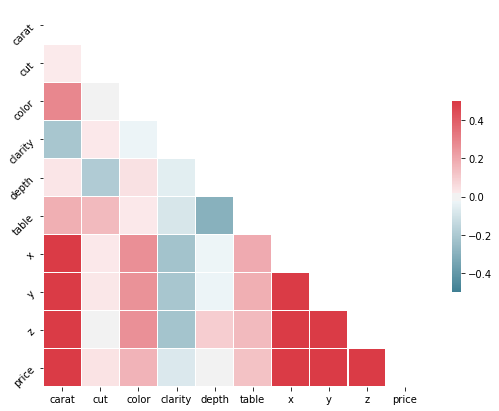

In [15]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-0.5,vmax=0.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.yticks(rotation=45)

In [16]:
train_dataset.drop(columns=['y','x','z'],inplace=True)

In [17]:
train_dataset

,carat,cut,color,clarity,depth,table,price
id,,,,,,,
0,0.30,4,2,5,62.8,56.0,605
1,0.34,2,1,2,62.6,55.0,565
2,0.40,4,0,2,60.3,62.0,720
3,0.40,3,4,4,61.8,59.2,793
4,0.90,4,0,2,61.0,63.0,4381
...,...,...,...,...,...,...,...
40450,0.32,2,0,4,61.5,56.0,862
40451,0.30,2,0,5,60.9,57.0,710
40452,0.47,3,3,2,62.7,58.0,931


## standardization

In [18]:
x = train_dataset.drop(["price"], axis = 1)
y = train_dataset.price
scaler = StandardScaler()
scaler.fit_transform(x, y)

array([[-1.05135495,  1.40424556, -0.35216095,  0.67355851,  0.73612621,
        -0.65017643],
       [-0.96676437, -0.54145962, -0.94076909, -1.06802462,  0.59636262,
        -1.09747554],
       [-0.83987851,  1.40424556, -1.52937722, -1.06802462, -1.01091858,
         2.03361824],
       ...,
       [-0.691845  ,  0.43139297,  0.23644718, -1.06802462,  0.66624442,
         0.24442179],
       [-0.83987851, -1.51431221,  0.23644718,  0.67355851,  1.22529875,
        -0.65017643],
       [ 2.5860398 ,  1.40424556,  0.82505532, -0.48749691,  0.38671725,
         0.24442179]])

In [19]:
dataset_standar = pd.DataFrame(scaler.fit_transform(x, y), columns= x.columns)

In [20]:
dataset_standar

,carat,cut,color,clarity,depth,table
0,-1.051355,1.404246,-0.352161,0.673559,0.736126,-0.650176
1,-0.966764,-0.541460,-0.940769,-1.068025,0.596363,-1.097476
2,-0.839879,1.404246,-1.529377,-1.068025,-1.010919,2.033618
3,-0.839879,0.431393,0.825055,0.093031,0.037308,0.781181
4,0.217504,1.404246,-1.529377,-1.068025,-0.521746,2.480917
...,...,...,...,...,...,...
40450,-1.009060,-0.541460,-1.529377,0.093031,-0.172337,-0.650176
40451,-1.051355,-0.541460,-1.529377,0.673559,-0.591628,-0.202877
40452,-0.691845,0.431393,0.236447,-1.068025,0.666244,0.244422
40453,-0.839879,-1.514312,0.236447,0.673559,1.225299,-0.650176


## train

In [21]:
X = dataset_standar
y = train_dataset.price

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# models 

In [23]:
models = {
    "randomforestregressor1": RandomForestRegressor(n_estimators=100),
    "randomforestregressor2": RandomForestRegressor(n_estimators=200),
    "randomforestregressor2": RandomForestRegressor(n_estimators=250),
    "randomforestregressor3": RandomForestRegressor(n_estimators=500),
    "boosting":GradientBoostingRegressor(),
    "neigbor":KNeighborsRegressor(),
    "tree":tree.DecisionTreeClassifier()
}

In [24]:
for name, model in models.items():
    print(f"Training {name}")
    model.fit(X_train,y_train)
    print(np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=3, n_jobs=2)))
print("Fin")

Training randomforestregressor1
0.9784111473808429
Training randomforestregressor2
0.9784285325967873
Training randomforestregressor3
0.9785135451986743
Training boosting
0.9711981923658567
Training neigbor
0.9361705119220799
Training tree


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


0.9072935520404019
Fin


In [25]:
d = {modelName:model.predict(X_test) for modelName, model in models.items()}
df = pd.DataFrame(d)
df.drop(columns = ["randomforestregressor1","randomforestregressor2","boosting","neigbor","tree"], inplace = True)
df["gt"] = y_test.reset_index(drop=True)
df.head()

,randomforestregressor3,gt
0,12524.236000,11774
1,1159.460867,1235
2,11284.960000,12174
3,2808.318000,2676
4,858.266400,1010


In [26]:
print("RSME", round((mean_squared_error(df["gt"],df["randomforestregressor3"])**0.5),3))

RSME 588.394


In [27]:
model = RandomForestRegressor(n_estimators=250)
model.fit(X, y)

RandomForestRegressor(n_estimators=250)

In [28]:
y_pred = model.predict(dataset_standar)

In [29]:
model = RandomForestRegressor(n_estimators=250).fit(X_train, y_train)
forest_prediction = model.predict(X_test)
print(r2_score(y_test, forest_prediction))
print((mean_squared_error(y_test, forest_prediction))**0.5)

0.9785668863156229
588.1996858638362


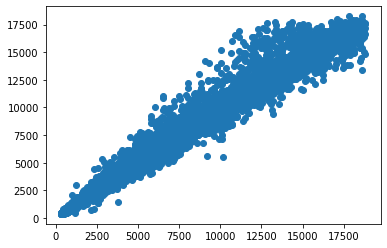

In [30]:
fig, ax = plt.subplots()
ax.scatter(y_test, forest_prediction)

## testing

In [31]:
df_test = pd.read_csv("Input/predict.csv", index_col = 0 )
df_test

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,2.36,Ideal,I,SI2,60.8,54.0,8.68,8.57,5.24
1,2.04,Ideal,H,SI2,62.0,56.0,8.18,8.23,5.09
2,0.51,Ideal,I,SI1,61.7,54.0,5.18,5.19,3.20
3,0.30,Ideal,I,SI1,61.3,56.0,4.32,4.33,2.65
4,0.96,Fair,H,VS2,68.8,56.0,6.11,5.98,4.16
...,...,...,...,...,...,...,...,...,...
13480,0.53,Premium,E,VVS1,60.8,59.0,5.23,5.17,3.16
13481,1.01,Very Good,F,SI1,62.8,60.0,6.32,6.38,3.99
13482,0.92,Premium,F,I1,60.7,58.0,6.29,6.26,3.81


In [32]:
df_test.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [33]:
le = preprocessing.LabelEncoder()
df_test["cut"] = le.fit_transform(df_test["cut"])
df_test["color"] = le.fit_transform(df_test["color"])
df_test["clarity"] = le.fit_transform(df_test["clarity"])

In [34]:
df_test.drop(columns=['y','x','z'],inplace=True)

In [40]:
price_pred=model.predict(df_test)
print(r2_score(y_test, forest_prediction))
print((mean_squared_error(y_test, forest_prediction))**0.5)

0.9785668863156229
588.1996858638362


In [41]:
df_price=pd.DataFrame({'price':price_pred})
df_price.index.rename('id', inplace=True)
df_price.head()

,price
id,
0,10327.1764
1,9659.4540
2,5013.1240
3,3598.7120
4,6103.4960


In [ ]:
df_price.to_csv("output/train1.csv")